In [5]:
#import the libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import zipfile, os, shutil
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#Find the datas
train_dir = r"C:\Users\Soundar\OneDrive\Desktop\food calorie estimation\dataset\training"
val_dir = r"C:\Users\Soundar\OneDrive\Desktop\food calorie estimation\dataset\validation"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

print("Classes found:", train_generator.class_indices)

Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.
Classes found: {'Bread': 0, 'Dairy product': 1, 'Dessert': 2, 'Egg': 3, 'Fried food': 4, 'Meat': 5, 'Noodles-Pasta': 6, 'Rice': 7, 'Seafood': 8, 'Soup': 9, 'Vegetable-Fruit': 10}


In [7]:
#load the Datas
img_height, img_width = 180, 180
batch_size = 32
class_names = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food',
               'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']
calorie_dict = {
    'Bread': 265, 'Dairy product': 150, 'Dessert': 400, 'Egg': 155, 'Fried food': 312,
    'Meat': 250, 'Noodles-Pasta': 221, 'Rice': 130, 'Seafood': 206, 'Soup': 75, 'Vegetable-Fruit': 65
}

In [9]:
#confirm the location of the files
train_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "dataset/evaluation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 9866 files belonging to 11 classes.
Found 3430 files belonging to 11 classes.
Found 3347 files belonging to 11 classes.


In [10]:
#train the model

model = models.Sequential([
    tf.keras.Input(shape=(img_height, img_width, 3)), 
    layers.Rescaling(1./255),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names)) 
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │           1,419 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,395 (25.36 MB)

 Trainable params: 6,648,395 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#train the datas
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 167s 478ms/step - accuracy: 0.2834 - loss: 2.0177 - val_accuracy: 0.3507 - val_loss: 1.8354
Epoch 2/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 166s 536ms/step - accuracy: 0.4081 - loss: 1.7071 - val_accuracy: 0.4437 - val_loss: 1.6438
Epoch 3/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 184s 595ms/step - accuracy: 0.4971 - loss: 1.4639 - val_accuracy: 0.4286 - val_loss: 1.6483
Epoch 4/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 188s 609ms/step - accuracy: 0.5970 - loss: 1.1725 - val_accuracy: 0.4589 - val_loss: 1.6311
Epoch 5/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 178s 575ms/step - accuracy: 0.7135 - loss: 0.8362 - val_accuracy: 0.4633 - val_loss: 1.8017
Epoch 6/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 181s 587ms/step - accuracy: 0.8455 - loss: 0.4699 - val_accuracy: 0.4609 - val_loss: 2.2505
Epoch 7/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 233s 755ms/step - accuracy: 0.9106 - loss: 0.2594 - val_accuracy: 0.4239 - val_loss: 2.7752
Epoch 8/10
309/309 ━━━━━━━━━━━━━━━━━━━━ 243s 785ms/step - accuracy: 0.9616 -

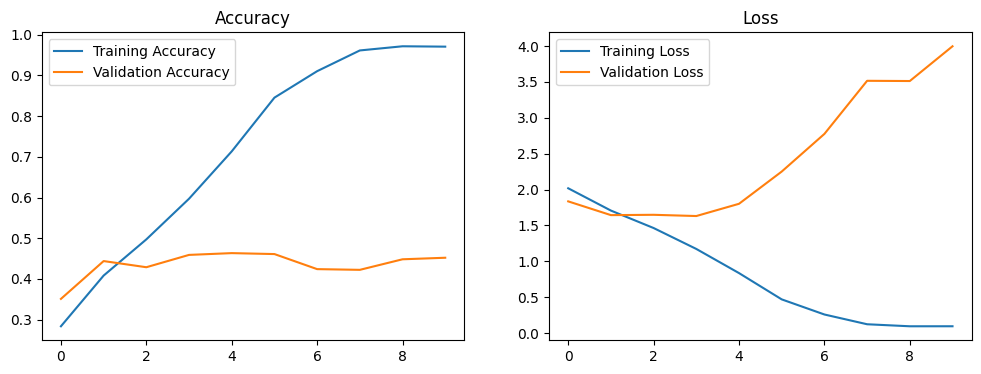

In [12]:
#show the graph 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


In [19]:
#test the model
def predict_and_calories(img_path):
    try:
        img = load_img(img_path, target_size=(img_height, img_width))
        img_array = img_to_array(img)
        img_array_exp = tf.expand_dims(img_array, 0)

        predictions = model.predict(img_array_exp)
        predicted_class = class_names[np.argmax(predictions)]
        confidence = np.max(tf.nn.softmax(predictions))
        estimated_cal = calorie_dict[predicted_class]

        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{predicted_class} ({estimated_cal} kcal, {confidence*100:.2f}% confident)")
        plt.show()

        print(f" Food Item: {predicted_class}")
        print(f" Estimated Calories: {estimated_cal} kcal")
        print(f" Accuracy: {confidence*100:.2f}%")

    except Exception as e:
        print("❌ Error:", e)

📷 Testing image: dataset/evaluation\Vegetable-Fruit\193.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


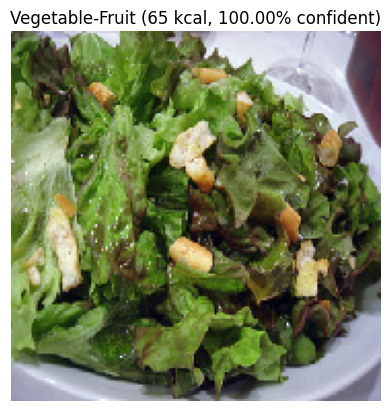

 Food Item: Vegetable-Fruit
 Estimated Calories: 65 kcal
 Accuracy: 100.00%


In [26]:
#test the model with images
def random_eval_image():
    base = "dataset/evaluation"
    categories = os.listdir(base)
    random_cat = random.choice(categories)
    cat_path = os.path.join(base, random_cat)
    images = os.listdir(cat_path)
    if images:
        img_path = os.path.join(cat_path, random.choice(images))
        print(f"📷 Testing image: {img_path}")
        predict_and_calories(img_path)
    else:
        print("❌ No images found in category:", random_cat)

random_eval_image()